In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
from wordcloud import WordCloud
from datetime import datetime
%matplotlib inline

In [2]:
#import data
twitter_user = pd.read_csv('./datasets/users.csv')
tweets = pd.read_csv('./datasets/tweets.csv')

## Clean Twitter_user dataframe

In [3]:
#view missing data
missing_user_df = twitter_user.isnull().sum(axis=0)
missing_user_df

id                   61
location            169
name                 70
followers_count      70
statuses_count       70
time_zone            85
verified             70
lang                 70
screen_name           0
description         115
created_at           70
favourites_count     70
friends_count        70
listed_count         70
dtype: int64

In [4]:
#remove missing data if the location is missing
twitter_user.dropna(subset=['location'], inplace=True)

In [5]:
#Replace null values in description with phrase "no description"
twitter_user['description'].fillna('no description', inplace=True)

In [6]:
twitter_user.dropna(subset=['time_zone'], inplace=True)
twitter_user.isnull().sum(axis=0)

id                  0
location            0
name                0
followers_count     0
statuses_count      0
time_zone           0
verified            0
lang                0
screen_name         0
description         0
created_at          0
favourites_count    0
friends_count       0
listed_count        0
dtype: int64

## Twitter_user data wrangling

### Reformating created_str to month and year columns

In [7]:
current_date = '%a %b %d %H:%M:%S %z %Y'
month = '%b'
year = '%Y'
twitter_user['month'] = (twitter_user.created_at.map(
    lambda x: datetime.strptime(str(x), current_date).strftime(month)))
twitter_user['year'] = (twitter_user.created_at.map(
    lambda x: datetime.strptime(str(x), current_date).strftime(year)))
twitter_user

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count,month,year
0,1.871082e+07,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0,Jan,2009
2,2.471657e+08,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0,Feb,2011
5,4.718689e+08,"Санкт-Петербург, Россия",Маргарита Саваж,23305.0,18401.0,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.0,8021.0,231.0,Jan,2012
6,1.039581e+09,Amerika,Dark Nally,22.0,22603.0,Jakarta,False,id,darknally,uptodate news!!!!,Thu Dec 27 13:06:58 +0000 2012,0.0,40.0,16.0,Dec,2012
7,1.510489e+09,USA,Laila Heats,3080.0,2228.0,Eastern Time (US & Canada),False,en,lagonehoe,How can you judge me when you don’t know me?,Wed Jun 12 13:07:49 +0000 2013,3504.0,2369.0,12.0,Jun,2013
8,1.513801e+09,USA,CC Jack,2760.0,2100.0,Eastern Time (US & Canada),False,en,YouJustCtrlC,ProBlack | Stoner | even jesus was stoned befo...,Thu Jun 13 16:07:23 +0000 2013,2744.0,2700.0,10.0,Jun,2013
9,1.517679e+09,"Philadelphia, PA",Mr Moran,879.0,2044.0,Eastern Time (US & Canada),False,en,MrMoraan,I'm getting too cool for this social media shi...,Fri Jun 14 21:58:48 +0000 2013,2981.0,758.0,15.0,Jun,2013
10,1.518857e+09,USA,Jonathon Norwood,789.0,2002.0,Eastern Time (US & Canada),False,en,NoJonathonNo,Strive not to be a success but rather to be of...,Sat Jun 15 08:47:02 +0000 2013,2170.0,440.0,8.0,Jun,2013
11,1.532864e+09,ATL,Harper H21,1956.0,3300.0,Eastern Time (US & Canada),False,en,CharlesJHarper,if you don't like me-it's ok,Thu Jun 20 04:49:04 +0000 2013,1850.0,1626.0,21.0,Jun,2013
12,1.533814e+09,USA,Lara Pretty,1795.0,3342.0,Eastern Time (US & Canada),False,en,PrettyLaraPlace,Bitter Clinger #USAFVet #NRA #2A #bluestarmom ...,Thu Jun 20 12:35:59 +0000 2013,3555.0,1360.0,24.0,Jun,2013


## Clean Tweets dataframe

In [8]:
#remove unneeded columns such as: user_id, created_at (created_str is the same thing but in timedate format), and tweet_id
tweets.drop(columns=['user_id', 'created_at', 'tweet_id'], inplace= True)

In [9]:
#remove rows with more than 6 missing values
missing_tweet_data = tweets[tweets.isnull().sum(axis = 1) > 6]
#create list of missing indexs
missing_tweet_id = missing_tweet_data.index
#drop rows by index
tweets.drop(index = missing_tweet_id ,inplace = True)
tweets.isnull().sum(axis=0)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203461 entries, 0 to 203481
Data columns (total 13 columns):
user_key                 203461 non-null object
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
source                   58083 non-null object
hashtags                 203461 non-null object
expanded_urls            203461 non-null object
posted                   203461 non-null object
mentions                 203461 non-null object
retweeted_status_id      39651 non-null float64
in_reply_to_status_id    559 non-null float64
dtypes: float64(4), object(9)
memory usage: 21.7+ MB


In [10]:
#replace null values in retweets_count, retweets, favorite_count, retweeted_status_id, 
#in_reply_to_status_id with 0
#replace null values in source with 'no source'
values={'retweet_count':0, 'retweeted':0, 'favorite_count':0, 'retweeted_status_id':0,'in_reply_to_status_id':0, 'source':'no source'}
tweets.fillna(value=values, inplace = True)
tweets.isnull().sum(axis=0)

user_key                 0
created_str              0
retweet_count            0
retweeted                0
favorite_count           0
text                     0
source                   0
hashtags                 0
expanded_urls            0
posted                   0
mentions                 0
retweeted_status_id      0
in_reply_to_status_id    0
dtype: int64

## Twitter_user data visualization

In [12]:

retweets = tweets['retweet_count'].value_counts().nlargest(20)
top_20_df = pd.DataFrame({'text':retweets.index, 'retweets':retweets.values})

(-0.5, 399.5, 199.5, -0.5)

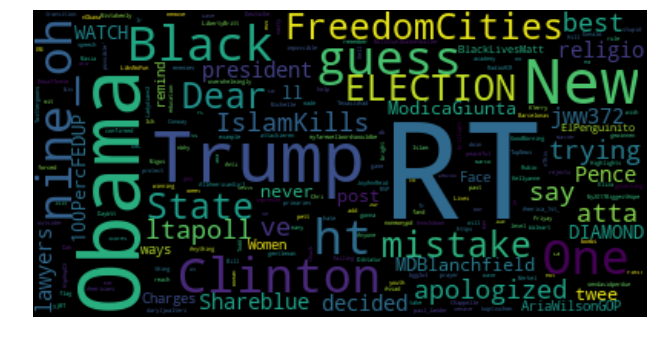

In [13]:
tweet_text = WordCloud().generate(str(tweets['text']))
# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(11,10))
axis1 = fig.add_subplot(111)
axis1.imshow(tweet_text, interpolation='bilinear')
axis1.axis("off")

In [ ]:
tweet_text = WordCloud().generate(str(twitter_user['description']))
# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(11,10))
axis1 = fig.add_subplot(111)
axis1.imshow(tweet_text, interpolation='bilinear')
axis1.axis("off")